In [1]:
import random
%load_ext autoreload
%autoreload 2
import chess
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

In [21]:

class A:
    def a(self, x:int, y):
        print(type(x))

In [29]:
import inspect
from inspect import signature

for key in signature(A.a).parameters:
    param = signature(A.a).parameters[key]
    if param.annotation is not inspect._empty:
        print(param.annotation(1))

1


In [13]:
"".split()

[]

In [5]:
def a():
    yield 1
    yield 2

def b():
    for x in a(): yield x

In [6]:
for c in b():
    print(c)

1
2


In [3]:
import chesslab
from chesslab.evaluator import evaluate, SimpleSelector, RandomSelector
from chesslab.automaton import Automaton
from chesslab.puzzle import Puzzle
from chesslab.puzzle_provider import PuzzleProvider
from chesslab.game_score import cmp_score, score_to_numeric

In [4]:
import pandas as pd
import chess

In [5]:
import subprocess
from chess import Board, Move, Color
from chess.engine import SimpleEngine, Limit, PovScore
from chess.engine import Cp, Mate, MateGiven

In [6]:
board = Board()

In [10]:
board.parse_san("e10")

InvalidMoveError: invalid san: 'e10'

<Status.VALID: 0>

In [13]:
cmp_score(Mate(3), Cp(900))

-100

In [5]:
score_to_numeric(Mate(-3))

-1000

In [4]:
df = pd.read_csv('../data/lichess_db_puzzle.csv.zst')

In [5]:
len(df)

3625534

In [7]:
df.head(100)

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1879,74,94,5070,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1543,73,96,24566,advantage endgame short,https://lichess.org/F8M8OS71#53,NaN
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1335,75,90,482,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,NaN
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1105,74,87,553,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...
4,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1556,81,73,87,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,NaN
...,...,...,...,...,...,...,...,...,...,...
95,006HV,1r6/5k2/2p1pNp1/p5Pp/1pQ1P2P/2P4R/KP3P2/3q4 w ...,c4c6 b4b3 a2a3 d1a1,1178,77,92,901,endgame mate mateIn2 short,https://lichess.org/ibb2c72C#61,NaN
96,006NL,1r6/k2qn1b1/p1b1p1p1/2PpPpN1/2nN1P1P/p4B2/1PP2...,d4c6 e7c6 b2b3 a3a2 b1a1 c4e5 f4e5 g7e5 a1a2 b8b5,2317,109,85,66,advancedPawn advantage middlegame pin veryLong,https://lichess.org/yA3M5Q6W#63,NaN
97,006RM,1k1r3r/2q5/pp1n2p1/8/1Q6/3R2P1/PPP2P1P/3R2K1 b...,c7c5 b4c5 b6c5 d3d6 d8d6 d1d6,1401,76,93,985,crushing long middlegame,https://lichess.org/ceS0QvtT/black#58,NaN
98,006XF,r5kr/pp1qb1p1/2p4p/3pPb1Q/3P4/2P1B3/PP4PP/R4RK...,f5e4 h5f7 g8h7 f1f6 e7f6 f7d7,2332,80,89,1680,advantage long middlegame pin,https://lichess.org/Ynra1LLE/black#34,Russian_Game Russian_Game_Italian_Variation


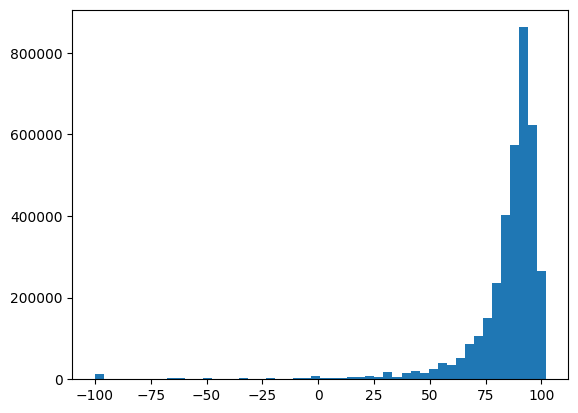

In [86]:
# plt.hist(df.NbPlays, bins = np.arange(0, 30000, 100), log=False)
plt.hist(df.Popularity, bins=50)
plt.show()

In [88]:
len(df[df.NbPlays < 25])

286013

In [7]:
df_part = df[(df.Rating > 1500) & (df.Rating < 1600) & (df.Popularity > 60)]

In [8]:
len(df_part)

217767

In [117]:
pp = PuzzleProvider(training_sets=[df_part], weights=[1])
pp.rnd_flipped = True

1549
33... Qe6 *


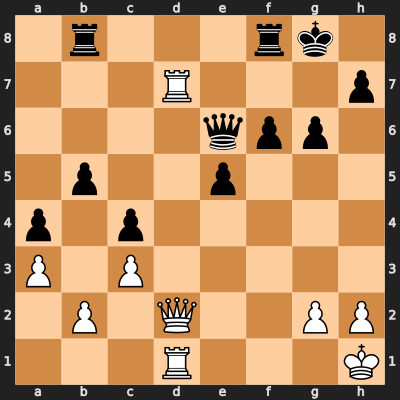

white to move


In [118]:
puzzle = pp.next_puzzle(display=display)

In [119]:
puzzle.solution()

'33... Qe6 34. Qh6 Rf7 35. Rd8+ Qe8 36. Rxe8+ *'

In [19]:
board = Board()

In [12]:
sample = df_part.sample()
fen = sample['FEN'].values[0]
moves = sample['Moves'].values[0].split()

In [1]:
board = Board(fen)
#board.uci(Move.from_uci(moves[0]))
print(board.san(Move.from_uci(moves[0])))
board.push_uci(moves[0])
print('white' if board.turn else 'black')
display(chess.svg.board(board, size=400))

NameError: name 'Board' is not defined

In [31]:
from collections import Counter
vector_trans = {'N': 1, 'B': 2, 'R': 3, 'Q': 4, 'K': 5, 'O': 6}

def sans2vector(sans):
    res = [0] * 7
    for s in sans:
        key = s[0]
        if key.islower():
            index = 0
        else:
            index = vector_trans[key]
        res[index] += 1

    return res

In [37]:
N = 10000
vecs = []
ids = []
for _ in range(N):
    sample = df_part.sample()
    fen = sample['FEN'].values[0]
    puzzle_id = sample['PuzzleId'].values[0]
    moves = sample['Moves'].values[0].split()
    board = Board(fen)
    board.push_uci(moves[0])
    board.turn = True
    whites = [board.san(m) for m in board.pseudo_legal_moves]
    white_vec = sans2vector(whites)
    board.turn = False
    blacks = [board.san(m) for m in board.pseudo_legal_moves]
    black_vec = sans2vector(blacks)
    vec = white_vec + black_vec
    vecs.append(vec)
    ids.append(puzzle_id)
    # print(white_vec + black_vec)

In [44]:
import sklearn
import sklearn.neighbors
import random

In [42]:
neigh = sklearn.neighbors.NearestNeighbors()
neigh.fit(vecs)

NearestNeighbors()

In [45]:
index = random.randint(0, len(vecs))
puzzle_id = ids[index]
vec = vecs[index]


In [56]:
_, [indices] = neigh.kneighbors([vec], 5)

In [57]:
list(indices)

[5052, 1340, 3662, 8404, 3986]

In [61]:
df[df.PuzzleId == puzzle_id]

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags


29... Qxc3 *


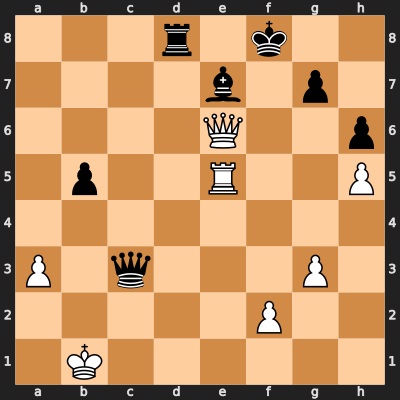

white to move
36... Bxg5 *


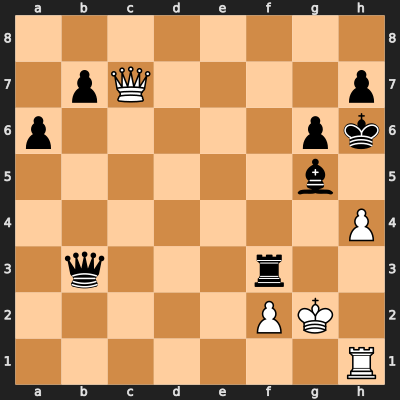

white to move
39... Qxc3 *


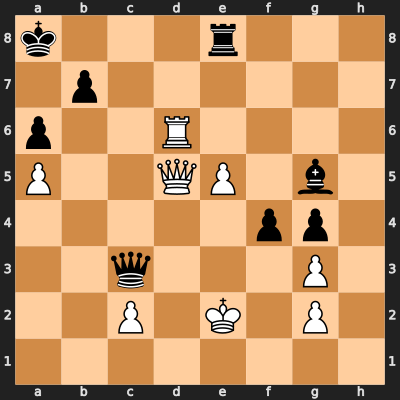

white to move
37... Qxc3 *


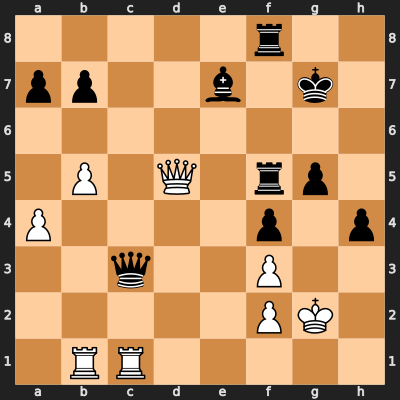

white to move
26... R5f6 *


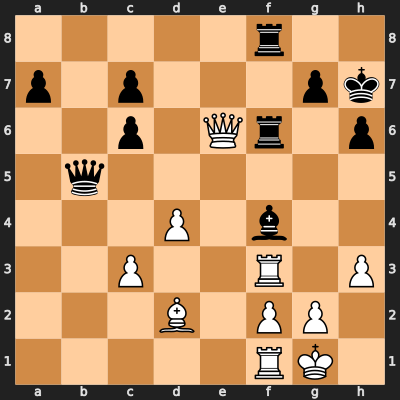

white to move


In [62]:
for i in indices:
    puzzle_id = ids[i]
    sample = df[df.PuzzleId == puzzle_id]
    fen = sample['FEN'].values[0]
    moves = sample['Moves'].values[0]
    rating = sample['Rating'].values[0]
    url = sample['GameUrl'].values[0]
    title = f"{url} ({rating})"
    puzzle = Puzzle(fen=fen, uci_moves_string=moves, title=title)
    puzzle.jupyter_dsp(display)

In [106]:
sample = df_part.sample()
fen = sample['FEN'].values[0]
moves = sample['Moves'].values[0]
puzzle = Puzzle(fen=fen, uci_moves_string=moves)

15... Re8 *


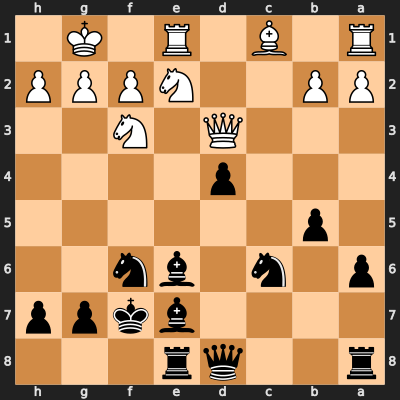

white to move


In [111]:
puzzle.jupyter_dsp(display, flipped=True)

In [112]:
puzzle.solution()

'15... Re8 16. Ng5+ Kg8 17. Nxe6 *'

In [5]:
chesslab.__version__

'0.0.2'

In [9]:
engine = SimpleEngine.popen_uci("../engines/stockfish.exe", creationflags=subprocess.CREATE_NO_WINDOW)

In [10]:
limit = Limit(time=1)

In [19]:
analysis = engine.analysis(board, limit)

In [20]:
for info in analysis:
    print(info)

{'string': 'NNUE evaluation using nn-5af11540bbfe.nnue enabled'}
{'depth': 1, 'seldepth': 1, 'multipv': 1, 'score': PovScore(Cp(-34), BLACK), 'nodes': 38, 'nps': 38000, 'hashfull': 0, 'tbhits': 0, 'time': 0.001, 'pv': [Move.from_uci('e7e5')]}
{'depth': 2, 'seldepth': 2, 'multipv': 1, 'score': PovScore(Cp(-34), BLACK), 'nodes': 61, 'nps': 61000, 'hashfull': 0, 'tbhits': 0, 'time': 0.001, 'pv': [Move.from_uci('e7e5')]}
{'depth': 3, 'seldepth': 3, 'multipv': 1, 'score': PovScore(Cp(-37), BLACK), 'nodes': 108, 'nps': 108000, 'hashfull': 0, 'tbhits': 0, 'time': 0.001, 'pv': [Move.from_uci('e7e5'), Move.from_uci('g1f3'), Move.from_uci('b8c6')]}
{'depth': 4, 'seldepth': 4, 'multipv': 1, 'score': PovScore(Cp(-37), BLACK), 'nodes': 144, 'nps': 144000, 'hashfull': 0, 'tbhits': 0, 'time': 0.001, 'pv': [Move.from_uci('e7e5'), Move.from_uci('g1f3'), Move.from_uci('b8c6')]}
{'depth': 5, 'seldepth': 5, 'multipv': 1, 'score': PovScore(Cp(-33), BLACK), 'nodes': 179, 'nps': 89500, 'hashfull': 0, 'tbhits

In [60]:
board.push(Move.from_uci("e2e4"))

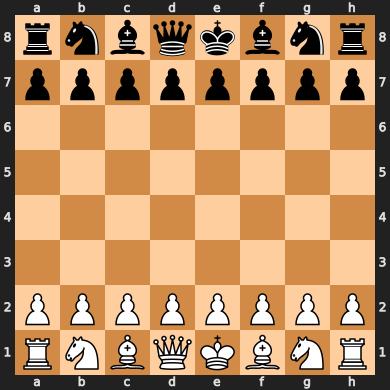

In [14]:
board

In [11]:
res = evaluate(board, engine, limit)

In [42]:
ss = RandomSelector()

In [47]:
ss.select_move(res)

Move.from_uci('f2f4')

In [41]:
res.eval_res

{'g1h3': {1: PovScore(Cp(-5), BLACK),
  2: PovScore(Cp(-5), BLACK),
  3: PovScore(Cp(+2), BLACK),
  4: PovScore(Cp(+26), BLACK),
  5: PovScore(Cp(+100), BLACK),
  6: PovScore(Cp(+78), BLACK),
  7: PovScore(Cp(+70), BLACK),
  8: PovScore(Cp(+21), BLACK),
  9: PovScore(Cp(+24), BLACK),
  10: PovScore(Cp(+27), BLACK),
  11: PovScore(Cp(+39), BLACK),
  12: PovScore(Cp(+44), BLACK),
  13: PovScore(Cp(+43), BLACK),
  14: PovScore(Cp(+54), BLACK),
  15: PovScore(Cp(+53), BLACK),
  16: PovScore(Cp(+58), BLACK),
  17: PovScore(Cp(+64), BLACK),
  18: PovScore(Cp(+52), BLACK),
  19: PovScore(Cp(+52), BLACK)},
 'g1f3': {1: PovScore(Cp(-38), BLACK),
  2: PovScore(Cp(-38), BLACK),
  3: PovScore(Cp(-27), BLACK),
  4: PovScore(Cp(-22), BLACK),
  5: PovScore(Cp(-22), BLACK),
  6: PovScore(Cp(-25), BLACK),
  7: PovScore(Cp(-25), BLACK),
  8: PovScore(Cp(-24), BLACK),
  9: PovScore(Cp(-24), BLACK),
  10: PovScore(Cp(-22), BLACK),
  11: PovScore(Cp(-14), BLACK),
  12: PovScore(Cp(-14), BLACK),
  13: PovSc

In [57]:
type(board.turn)

bool

In [16]:
board.outcome()

In [21]:
automaton = Automaton(engine, limit, SimpleSelector())

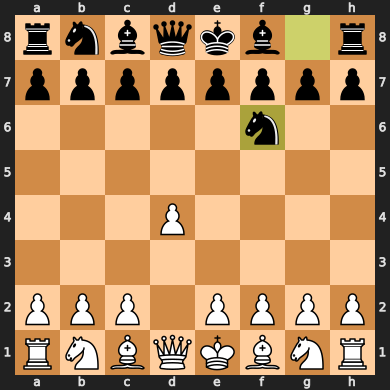

In [23]:
automaton.move(board)

In [31]:
a = chess.svg.board(board, size=400)

In [30]:
str(a)

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" viewBox="0 0 390 390" width="400" height="400"><desc><pre>r n b q k b . r\np p p p p p p p\n. . . . . n . .\n. . . . . . . .\n. . . P P . . .\n. . . . . . . .\nP P P . . P P P\nR N B Q K B N R</pre></desc><defs><g id="white-pawn" class="white pawn"><path d="M22.5 9c-2.21 0-4 1.79-4 4 0 .89.29 1.71.78 2.38C17.33 16.5 16 18.59 16 21c0 2.03.94 3.84 2.41 5.03-3 1.06-7.41 5.55-7.41 13.47h23c0-7.92-4.41-12.41-7.41-13.47 1.47-1.19 2.41-3 2.41-5.03 0-2.41-1.33-4.5-3.28-5.62.49-.67.78-1.49.78-2.38 0-2.21-1.79-4-4-4z" fill="#fff" stroke="#000" stroke-width="1.5" stroke-linecap="round" /></g><g id="white-knight" class="white knight" fill="none" fill-rule="evenodd" stroke="#000" stroke-width="1.5" stroke-linecap="round" stroke-linejoin="round"><path d="M 22,10 C 32.5,11 38.5,18 38,39 L 15,39 C 15,30 25,32.5 23,18" style="fill:#ffffff; stroke:#000000;" /><path d="M 24,18 C 24.38,20.91 18.45,25.37 16,27 C 13,29 13.18

In [26]:
board.push_san('e4')

Move.from_uci('e2e4')

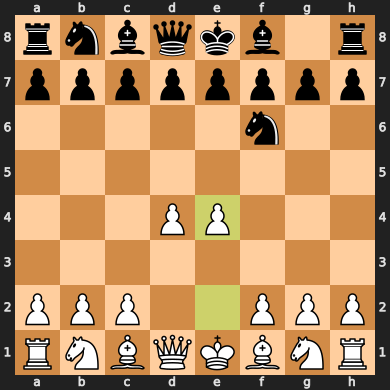